**Dataset**<br>
Dataset ini terdiri dari 303 data dengan 14 atribut. Dataset ini berisi data pasien dimana pasien diklasifikasikan menjadi 0 dan 1. 0 menanandakan bahwa pasien memiliki kemungkinan rendah terkena serangan jantungsedangkan 1 menunjukan bahwa pasien memiliki kemungkinan yang tinggi untuk terkena serangan jantung.
<br> Dataset diperoleh dari https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

data = pd.read_csv('/content/gdrive/MyDrive/Data Portofolio/heart.csv')

Mounted at /content/gdrive


In [ ]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# **Cleaning Data**

## **Cek Missing Value**

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## **Cek duplicate data**

In [ ]:
#jumlah data awal
data.shape

(303, 14)

In [ ]:
data.duplicated().sum()

1

Karena terdapat duplikasi data maka data duplikasi dihapus

In [ ]:
data=data.drop_duplicates()

In [ ]:
#jumlah data setelap duplikat data dihapus
data.shape

(302, 14)

In [ ]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# **Visualisasi Data**

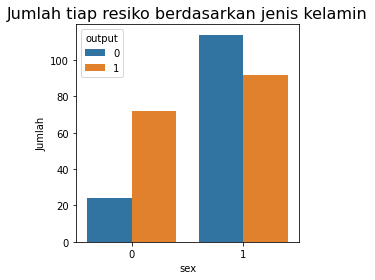

In [ ]:
f, ax1 = plt.subplots(1, figsize=(4, 4), sharex=False)
#fig = plt.figure(figsize =(4, 4))
sns.countplot(x=data["sex"], hue="output", data=data)
ax1.set_ylabel("Jumlah")
plt.title("Jumlah tiap resiko berdasarkan jenis kelamin", size=16)
plt.show()

Output 0 = resiko serangan jantung rendah<br>
Output 1 = resiko serangan jantung tinggi

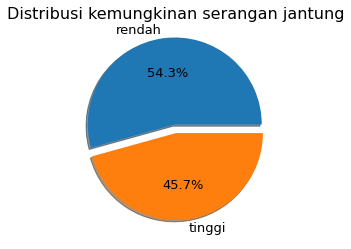

In [ ]:
palette_color = sns.color_palette('dark')
label=['rendah','tinggi']
plt.pie(data["output"].value_counts(),
        autopct = '%1.1f%%',
        textprops = {'fontsize': 13},
        explode =(0.1, 0),
        labels = label,
        shadow = True
        )
plt.title('Distribusi kemungkinan serangan jantung',size=16)
plt.show()

Distribusi keseluruhan setiap kemungkinan serangan jantung

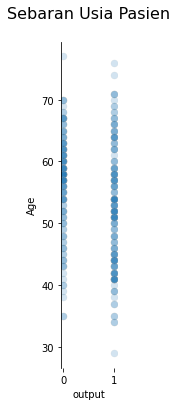

In [ ]:
f, ax1 = plt.subplots(1, figsize=(1, 6), sharex=False)
sns.scatterplot(x=data["output"].astype(float), y=data['age'].astype(float),
 alpha=.2, hue_norm=(-1, 1), edgecolor=".7", 
 size_norm=(-.2, .8), data=data, ax=ax1, s=50)

ax1.set_ylabel("Age")
ax1.set_title('Sebaran Usia Pasien\n', size=16)
sns.despine(bottom=True)

Sebaran useia pasien pada kedua resiko serangan jantung

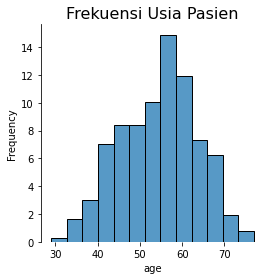

In [ ]:
f, ax1 = plt.subplots(1, figsize=(4, 4), sharex=False)
sns.histplot(
 x=data['age'],
 stat= "frequency",
 ax=ax1
)
ax1.set_title('Frekuensi Usia Pasien', size=16)
sns.despine(bottom=True)

Frekuensi usia pasien dari data secara keseluruhan tanpa mengenal kategori resiko serangan jantung.<br>
Gambar frekuensi usia pasien diatas menunjukan bahwa paling banyak pasien berusia 50-60 tahun

# **SPLIT DATA**

**Extraxt Feature and Label**

In [ ]:
X=data.iloc[:,:-1]
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y=data.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 302, dtype: int64

**Split Data**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=42)

Dataset di split menjadi 70 data trainning dan 30 data testing.

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(211, 13)
(91, 13)
(211,)
(91,)


# **MODEL**

## **Normalisasi Data**

In [ ]:
scaler=MinMaxScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train))
X_test=pd.DataFrame(scaler.transform(X_test))

pada feature dilakukan normalisasi data agar nilai data tidak jauh perbedaannya

## **Mencari parameter terbaik**
Untuk mendapatkan performa yang optimal maka digunakan GridSearchCV untuk mencari parameter yang terbaik supaya akurasi yang didapat optimal

In [ ]:
RF=RandomForestClassifier()

In [ ]:
parameters={'n_estimators': [100,200,300],
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 5, 10]}

In [ ]:
grid=GridSearchCV(RF,parameters, cv=10,scoring='accuracy',return_train_score=False)

In [ ]:
grid_search=grid.fit(X_train,y_train)

In [ ]:
print(grid_search.best_params_)

{'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 300}


Supaya hasil klasifikasi optimal maka berdasarkan hasil GridSearchCv parameter yang digunakan adalah max_depth: 3, min_samples_split: 5, dan n_estimators: 300

In [ ]:
accuracy=grid.best_score_*100
print("Akurasi dari parameter terbaik : {:.2f}%".format(accuracy))

Akurasi dari parameter terbaik : 82.92%


## **Implementasi Model Random Forest**

In [ ]:
RFC=RandomForestClassifier(n_estimators=300,max_depth=3,min_samples_split=5)

In [ ]:
RFC.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_split=5, n_estimators=300)

In [ ]:
RFC.score(X_train,y_train)

0.8862559241706162

In [ ]:
y_pred=RFC.predict(X_test)

In [ ]:
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1])

# **Evaluasi Model**

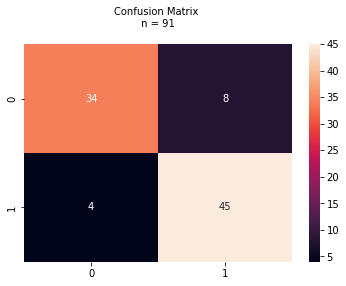

In [ ]:
c_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(c_matrix, annot = True)
plt.title('Confusion Matrix \n n = {} \n'.format(X_test.shape[0]), fontsize=10)
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        42
           1       0.85      0.92      0.88        49

    accuracy                           0.87        91
   macro avg       0.87      0.86      0.87        91
weighted avg       0.87      0.87      0.87        91



In [ ]:
print('Training score : {:.3f}'.format(RFC.score(X_train, y_train)))
print('Testing score  : {:.3f}'.format(RFC.score(X_test, y_test)))

Training score : 0.886
Testing score  : 0.868


*   Model menghasilkan akurasi 87%
*   Dari 30% data testing (91 data), 4 data resiko tinggi salah diklasifikasikan.
*   Dari 30% data testing (91 data), 8 data resiko rendah salah diklasifikasikan.
*   score dari trainning dan testing memiliki nilai yang hampir sama sehingga model termasuk bagus




